In [1]:
import pandas as pd

In [2]:
joindb = pd.read_csv('pa_join_database.csv')

/tmp/ipykernel_15173/2315220192.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  joindb = pd.read_csv('pa_join_database.csv')


In [3]:
joindb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263032 entries, 0 to 263031
Data columns (total 67 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   GEOID                 263032 non-null  int64  
 1   STATEFP               263032 non-null  int64  
 2   COUNTYFP              263032 non-null  int64  
 3   COUNTYNS              263032 non-null  int64  
 4   NAME_1                263032 non-null  object 
 5   NAMELSAD              263032 non-null  object 
 6   LSAD                  263032 non-null  object 
 7   CLASSFP               263032 non-null  object 
 8   MTFCC                 263032 non-null  object 
 9   CSAFP                 0 non-null       float64
 10  CBSAFP                0 non-null       float64
 11  METDIVFP              0 non-null       float64
 12  FUNCSTAT              263032 non-null  object 
 13  ALAND                 263032 non-null  float64
 14  AWATER                263032 non-null  float64
 15  

In [4]:
county = joindb.drop_duplicates(subset='GEOID')

<AxesSubplot: >

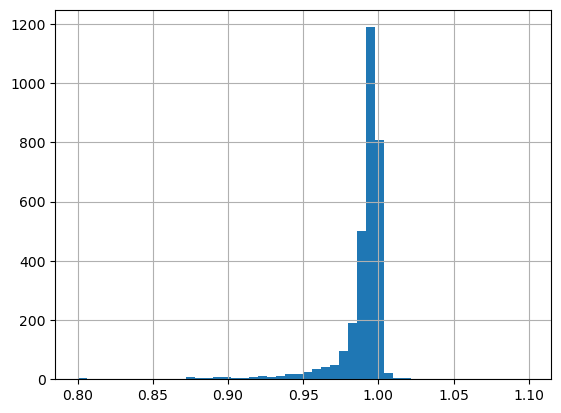

In [5]:
(county['ALAND'].div(1e6) / county['terrestrial_area_km2']).hist(bins=50, range=(0.8, 1.1))

In [7]:
pd.options.display.max_columns = 100

In [11]:
joindb.head().dropna(axis=1, how='all')

,GEOID,STATEFP,COUNTYFP,COUNTYNS,NAME_1,NAMELSAD,LSAD,CLASSFP,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,terrestrial_area_km2,FeatClass,d_FeatClas,Category,d_Category,Own_Type,d_Own_Type,Own_Name,d_Own_Name,Loc_Own,Mang_Type,d_Mang_Typ,Mang_Name,d_Mang_Nam,Loc_Mang,Des_Tp,d_Des_Tp,Loc_Ds,Unit_Nm,Loc_Nm,State_Nm,d_State_Nm,Agg_Src,GIS_Src,Src_Date,GIS_Acres,Source_PAID,WDPA_Cd,Pub_Access,d_Pub_Acce,Access_Src,Access_Dt,GAP_Sts,GAPCdSrc,GAPCdDt,IUCN_Cat,d_IUCN_Cat,IUCNCtSrc,IUCNCtDt,Comments,protected_area_km2
0,1001,1,1,161526,Autauga,Autauga County,6,H1,G4020,A,1.539631e+09,25677536.0,32.532237,-86.646439,1546.0,Fee,Fee,Fee,Fee,UNK,Unknown,UNK,Unknown,Unknown,FED,Federal,USACE,Army Corps of Engineers,Mobile,REC,Recreation Management Area,Recreation Area,Millers Ferry Lock Recreation Area,MILLERS FERRY LOCK,AL,Alabama,USGS_PADUS1_4Fee_USACE_174_fee,USACE_174_fee.shp,2015/03/23,15105,K511230,0,OA,Open Access,GAP - Default,2021,4 - no known mandate for biodiversity protection,GAP - Default,2021,Unassigned,Unassigned,GAP - Default,2021,NaN,0.0
1,1047,1,47,161549,Dallas,Dallas County,6,H1,G4020,A,2.534920e+09,39124772.0,32.333526,-87.114360,2569.0,Fee,Fee,Fee,Fee,UNK,Unknown,UNK,Unknown,Unknown,FED,Federal,USACE,Army Corps of Engineers,Mobile,REC,Recreation Management Area,Recreation Area,Millers Ferry Lock Recreation Area,MILLERS FERRY LOCK,AL,Alabama,USGS_PADUS1_4Fee_USACE_174_fee,USACE_174_fee.shp,2015/03/23,15105,K511230,0,OA,Open Access,GAP - Default,2021,4 - no known mandate for biodiversity protection,GAP - Default,2021,Unassigned,Unassigned,GAP - Default,2021,NaN,20.0
2,1131,1,131,161591,Wilcox,Wilcox County,6,H1,G4020,A,2.299541e+09,50592191.0,31.990082,-87.304935,2307.0,Fee,Fee,Fee,Fee,UNK,Unknown,UNK,Unknown,Unknown,FED,Federal,USACE,Army Corps of Engineers,Mobile,REC,Recreation Management Area,Recreation Area,Millers Ferry Lock Recreation Area,MILLERS FERRY LOCK,AL,Alabama,USGS_PADUS1_4Fee_USACE_174_fee,USACE_174_fee.shp,2015/03/23,15105,K511230,0,OA,Open Access,GAP - Default,2021,4 - no known mandate for biodiversity protection,GAP - Default,2021,Unassigned,Unassigned,GAP - Default,2021,NaN,0.0
3,1001,1,1,161526,Autauga,Autauga County,6,H1,G4020,A,1.539631e+09,25677536.0,32.532237,-86.646439,1546.0,Fee,Fee,Fee,Fee,STAT,State,OTHS,Other or Unknown State Land,Alabama Forestry Commission,STAT,State,SDOL,State Department of Land,Alabama Forestry Commission,SOTH,State Other or Unknown,State Nursery,Miller Nursery,Miller Nursery,AL,Alabama,ADCNR_PADUS1_4_AL,AFC_StateProperty_Poly_05132013.shp,2013/05/13,197,AL_AFC_12,0,XA,Closed,Alabama Department of Conservation and Natural...,2016,4 - no known mandate for biodiversity protection,GAP - Default,2021,Unassigned,Unassigned,GAP - Default,2021,made gap default - CMB,0.0
4,1001,1,1,161526,Autauga,Autauga County,6,H1,G4020,A,1.539631e+09,25677536.0,32.532237,-86.646439,1546.0,Fee,Fee,Fee,Fee,STAT,State,SFW,State Fish and Wildlife,"ADCNR, Division of Wildlife and Freshwater Fis...",STAT,State,SFW,State Fish and Wildlife,"ADCNR, Division of Wildlife and Freshwater Fis...",SCA,State Conservation Area,Wildlife Management Area,Autauga County Community Hunting Area,Autauga County Community Hunting Area,AL,Alabama,ADCNR_PADUS1_4_AL,WFF61313_Albers.shp,2013/06/13,369,AL_ADCNR_WFFD_1,6666149,RA,Restricted Access,Alabama Department of Conservation and Natural...,2016,2 - managed for biodiversity - disturbance eve...,GAP - Default,2021,V,V: Protected landscape / seascape,GAP - Default,2021,made gap default - CMB,0.0


In [17]:
joindb.loc[joindb['GAP_Sts'].str.match('^[34]'), 'protected_area_km2'].sum()

2425420.0

In [14]:
joindb.columns

Index(['GEOID', 'STATEFP', 'COUNTYFP', 'COUNTYNS', 'NAME_1', 'NAMELSAD',
       'LSAD', 'CLASSFP', 'MTFCC', 'CSAFP', 'CBSAFP', 'METDIVFP', 'FUNCSTAT',
       'ALAND', 'AWATER', 'INTPTLAT', 'INTPTLON', 'OBJECTID', 'NAME_2',
       'FTYPE', 'FCODE', 'FCODE_DESC', 'SQKM', 'SQMI', 'terrestrial_area_km2',
       'FeatClass', 'd_FeatClas', 'Category', 'd_Category', 'Own_Type',
       'd_Own_Type', 'Own_Name', 'd_Own_Name', 'Loc_Own', 'Mang_Type',
       'd_Mang_Typ', 'Mang_Name', 'd_Mang_Nam', 'Loc_Mang', 'Des_Tp',
       'd_Des_Tp', 'Loc_Ds', 'Unit_Nm', 'Loc_Nm', 'State_Nm', 'd_State_Nm',
       'Agg_Src', 'GIS_Src', 'Src_Date', 'GIS_Acres', 'Source_PAID', 'WDPA_Cd',
       'Pub_Access', 'd_Pub_Acce', 'Access_Src', 'Access_Dt', 'GAP_Sts',
       'd_GAP_Sts', 'GAPCdSrc', 'GAPCdDt', 'IUCN_Cat', 'd_IUCN_Cat',
       'IUCNCtSrc', 'IUCNCtDt', 'Date_Est', 'Comments', 'protected_area_km2'],
      dtype='object')

In [22]:
padus_cols = ['FeatClass', 'd_FeatClas', 'Category', 'd_Category', 'Own_Type',
       'd_Own_Type', 'Own_Name', 'd_Own_Name', 'Loc_Own', 'Mang_Type',
       'd_Mang_Typ', 'Mang_Name', 'd_Mang_Nam', 'Loc_Mang', 'Des_Tp',
       'd_Des_Tp', 'Loc_Ds', 'Unit_Nm', 'Loc_Nm', 'State_Nm', 'd_State_Nm',
       'Agg_Src', 'GIS_Src', 'Src_Date', 'GIS_Acres', 'Source_PAID', 'WDPA_Cd',
       'Pub_Access', 'd_Pub_Acce', 'Access_Src', 'Access_Dt', 'GAP_Sts',
       'd_GAP_Sts', 'GAPCdSrc', 'GAPCdDt', 'IUCN_Cat', 'd_IUCN_Cat',
       'IUCNCtSrc', 'IUCNCtDt', 'Date_Est', 'Comments']

In [23]:
padus = joindb[padus_cols].drop_duplicates()

In [24]:
padus.shape

(246311, 41)

In [27]:
padus.agg(['nunique', 'count',]).T

,nunique,count
FeatClass,1,246311
d_FeatClas,1,246311
Category,4,246311
d_Category,4,246311
Own_Type,9,246311
d_Own_Type,9,246311
Own_Name,29,246311
d_Own_Name,29,246311
Loc_Own,28357,245895
Mang_Type,9,246311


In [28]:
cols_to_keep = {
   'GEOID': 'county_id_fips',
   #'STATEFP': '',
   #'COUNTYFP': '',
   #'COUNTYNS': '',
   #'NAME_1': '',
   #'NAMELSAD': '',
   #'LSAD': '',
   #'CLASSFP': '',
   #'MTFCC': '',
   #'CSAFP': '',
   #'CBSAFP': '',
   #'METDIVFP': '',
   #'FUNCSTAT': '',
   'ALAND': 'county_land_area_sq_meters',
   'AWATER': 'county_water_area_sq_meters',
   'INTPTLAT': 'internal_point_latitude',
   'INTPTLON': 'internal_point_longitude',
   #'OBJECTID': '',
   #'NAME_2': '',
   #'FTYPE': '',
   #'FCODE': '',
   #'FCODE_DESC': '',
   #'SQKM': '',
   #'SQMI': '',
   'terrestrial_area_km2': 'county_area_coast_clipped_km2',
   #'FeatClass': '',
   #'d_FeatClas': '',
   #'Category': '',
   'd_Category': 'protection_mechanism',
   #'Own_Type': '',
   'd_Own_Type': 'owner_type',
   #'Own_Name': '',
   'd_Own_Name': 'owner_name',
   #'Loc_Own': '',
   #'Mang_Type': '',
   'd_Mang_Typ': 'manager_type',
   #'Mang_Name': '',
   'd_Mang_Nam': 'manager_name',
   #'Loc_Mang': '',
   #'Des_Tp': '',
   'd_Des_Tp': 'designation_type_standardized',
   'Loc_Ds': 'designation_type_local',
   'Unit_Nm': 'name_padus',
   #'Loc_Nm': '',
   #'State_Nm': '',
   #'d_State_Nm': '',
   #'Agg_Src': '',
   #'GIS_Src': '',
   #'Src_Date': '',
   #'GIS_Acres': '',
   #'Source_PAID': 'id_paid',
   #'WDPA_Cd': '',
   #'Pub_Access': '',
   #'d_Pub_Acce': '',
   #'Access_Src': '',
   #'Access_Dt': '',
   'GAP_Sts': 'gap_status',
   #'d_GAP_Sts': '',
   #'GAPCdSrc': '',
   #'GAPCdDt': '',
   #'IUCN_Cat': '',
   #'d_IUCN_Cat': '',
   #'IUCNCtSrc': '',
   #'IUCNCtDt': '',
   #'Date_Est': '',
   #'Comments': '',
   'protected_area_km2': 'intersection_area_padus_km2',
}

In [29]:
subset = joindb.loc[:, cols_to_keep.keys()]
subset.rename(columns=cols_to_keep, inplace=True)

In [30]:
subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263032 entries, 0 to 263031
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   county_id_fips                 263032 non-null  int64  
 1   county_land_area_sq_meters     263032 non-null  float64
 2   county_water_area_sq_meters    263032 non-null  float64
 3   internal_point_latitude        263032 non-null  float64
 4   internal_point_longitude       263032 non-null  float64
 5   county_area_coast_clipped_km2  263032 non-null  float64
 6   protection_mechanism           263032 non-null  object 
 7   owner_type                     263032 non-null  object 
 8   owner_name                     263032 non-null  object 
 9   manager_type                   263032 non-null  object 
 10  manager_name                   263032 non-null  object 
 11  designation_type_standardized  263032 non-null  object 
 12  designation_type_local        

In [32]:
subset.nunique()

county_id_fips                     3110
county_land_area_sq_meters         3110
county_water_area_sq_meters        3110
internal_point_latitude            3110
internal_point_longitude           3110
county_area_coast_clipped_km2      2098
protection_mechanism                  4
owner_type                            9
owner_name                           29
manager_type                          9
manager_name                         29
designation_type_standardized        51
designation_type_local             1556
name_padus                       185691
gap_status                            4
intersection_area_padus_km2         474
dtype: int64

In [33]:
low_cardinality = subset.columns[subset.nunique().lt(2**8)]
low_cardinality

Index(['protection_mechanism', 'owner_type', 'owner_name', 'manager_type',
       'manager_name', 'designation_type_standardized', 'gap_status'],
      dtype='object')

In [37]:
subset = subset.astype({col: 'category' for col in low_cardinality}, copy=False)

In [48]:
subset = subset.astype({col: pd.StringDtype() for col in ('designation_type_local', 'name_padus')}, copy=False)

In [40]:
subset.loc[:,'county_id_fips'] = subset.loc[:,'county_id_fips'].astype(pd.StringDtype()).str.zfill(5)

In [49]:
subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263032 entries, 0 to 263031
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype   
---  ------                         --------------   -----   
 0   county_id_fips                 263032 non-null  string  
 1   county_land_area_sq_meters     263032 non-null  float64 
 2   county_water_area_sq_meters    263032 non-null  float64 
 3   internal_point_latitude        263032 non-null  float64 
 4   internal_point_longitude       263032 non-null  float64 
 5   county_area_coast_clipped_km2  263032 non-null  float64 
 6   protection_mechanism           263032 non-null  category
 7   owner_type                     263032 non-null  category
 8   owner_name                     263032 non-null  category
 9   manager_type                   263032 non-null  category
 10  manager_name                   263032 non-null  category
 11  designation_type_standardized  263032 non-null  category
 12  designation_type

In [50]:
subset.to_parquet('padus_intersect_counties.parquet')

In [51]:
test = pd.read_parquet('padus_intersect_counties.parquet')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263032 entries, 0 to 263031
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype   
---  ------                         --------------   -----   
 0   county_id_fips                 263032 non-null  string  
 1   county_land_area_sq_meters     263032 non-null  float64 
 2   county_water_area_sq_meters    263032 non-null  float64 
 3   internal_point_latitude        263032 non-null  float64 
 4   internal_point_longitude       263032 non-null  float64 
 5   county_area_coast_clipped_km2  263032 non-null  float64 
 6   protection_mechanism           263032 non-null  category
 7   owner_type                     263032 non-null  category
 8   owner_name                     263032 non-null  category
 9   manager_type                   263032 non-null  category
 10  manager_name                   263032 non-null  category
 11  designation_type_standardized  263032 non-null  category
 12  designation_type